# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color:#3B3B3B;">Iris Flower Classification</p>**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
species,
setosa,50
versicolor,50
virginica,50


In [5]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

C:\Users\ADMIN PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ADMIN PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning

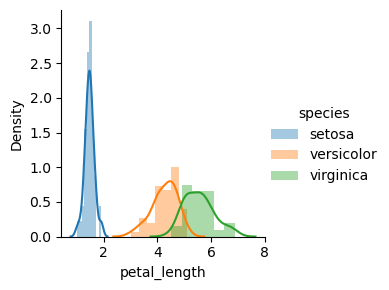

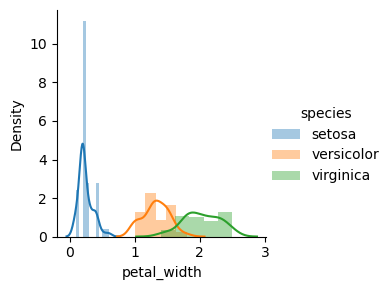

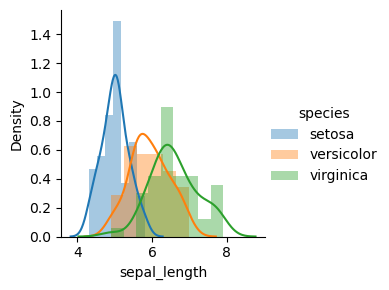

In [6]:
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

C:\Users\ADMIN PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


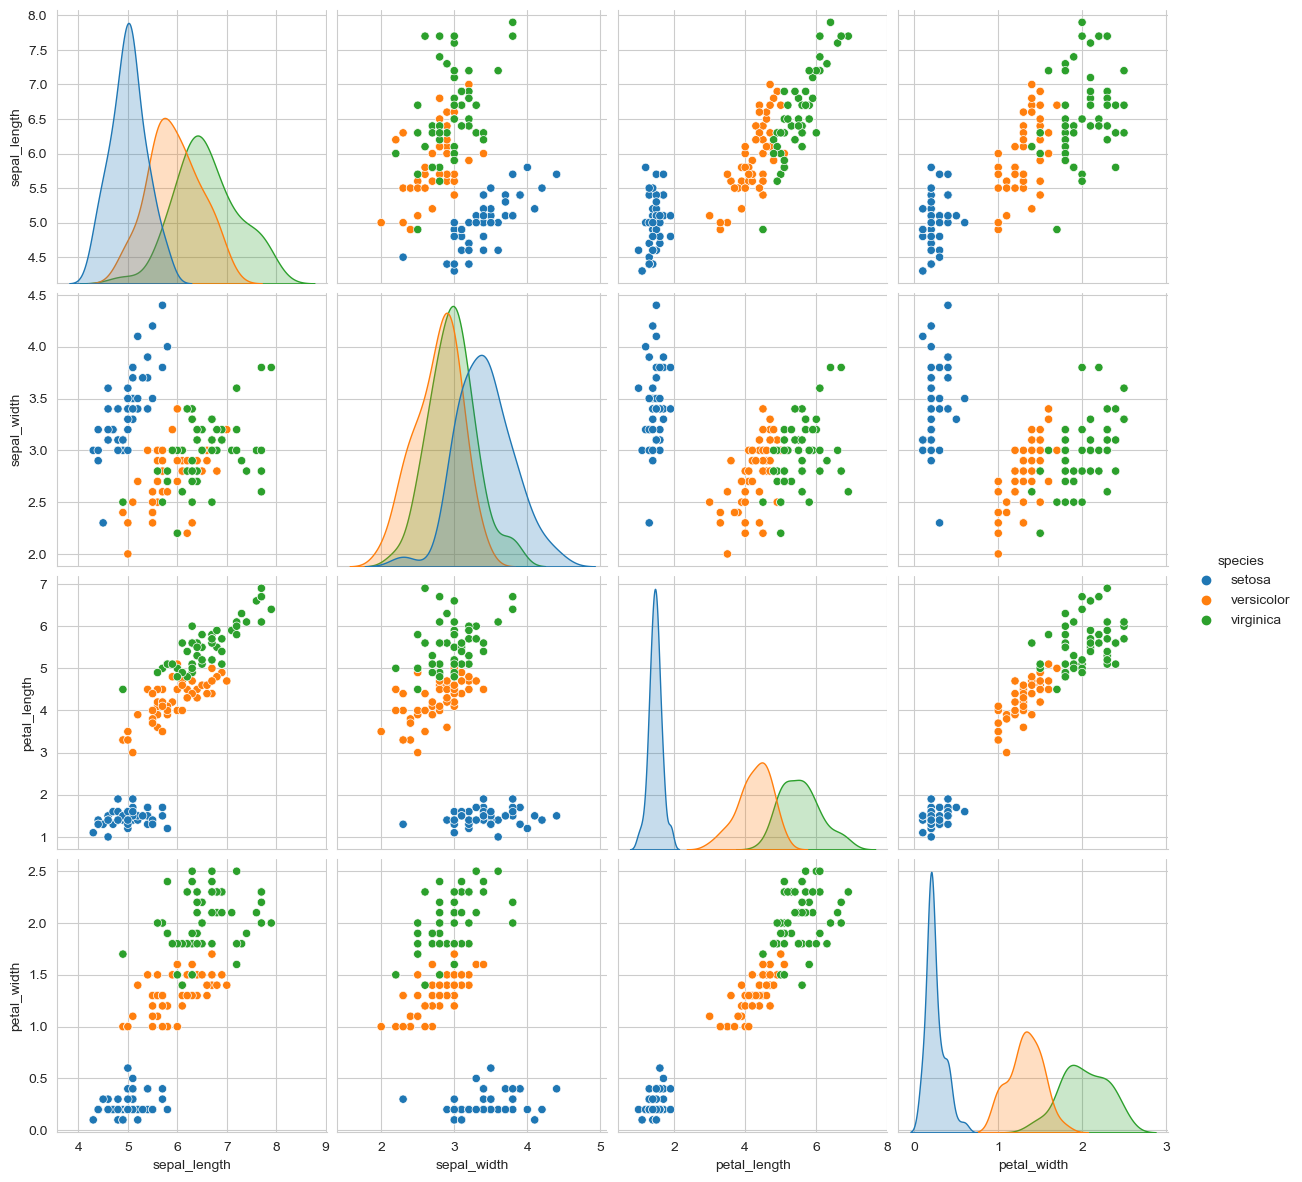

In [7]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

In [8]:
X = iris.drop('species', axis=1).values
y = iris['species'].values

In [9]:
# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [12]:
# Define the model
class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = tf.keras.layers.Dense(5, activation='relu')
        self.fc2 = tf.keras.layers.Dense(3, activation='relu')
        self.out = tf.keras.layers.Dense(3)

    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return self.out(x)

model = Model()

In [13]:
#  Loss function and optimizer
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [14]:
# Training loop
epochs = 200
losses = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = model(X_train)
        loss = loss_fn(y_train, y_pred)
    losses.append(loss.numpy())

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} Loss: {loss.numpy()}")

Epoch: 0 Loss: 3.6610422134399414
Epoch: 10 Loss: 1.434807300567627
Epoch: 20 Loss: 1.1428662538528442
Epoch: 30 Loss: 1.060605764389038
Epoch: 40 Loss: 1.0225783586502075
Epoch: 50 Loss: 0.9943710565567017
Epoch: 60 Loss: 0.9624395966529846
Epoch: 70 Loss: 0.9284948110580444
Epoch: 80 Loss: 0.8882176876068115
Epoch: 90 Loss: 0.8371055722236633
Epoch: 100 Loss: 0.7744945287704468
Epoch: 110 Loss: 0.7159773707389832
Epoch: 120 Loss: 0.6674694418907166
Epoch: 130 Loss: 0.6279248595237732
Epoch: 140 Loss: 0.5941487550735474
Epoch: 150 Loss: 0.56416916847229
Epoch: 160 Loss: 0.5373541712760925
Epoch: 170 Loss: 0.5132396221160889
Epoch: 180 Loss: 0.49147552251815796
Epoch: 190 Loss: 0.4716196656227112


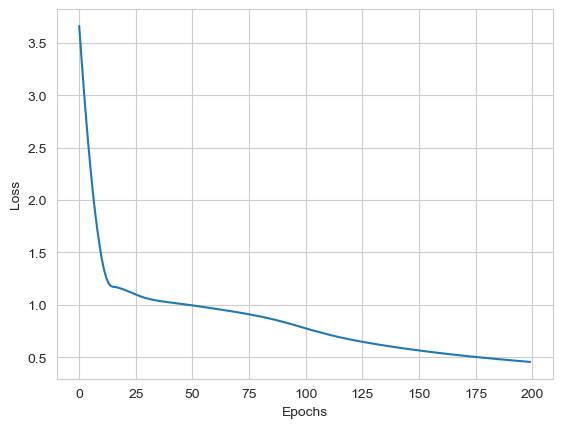

In [15]:
# Plot loss
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [16]:
# Evaluate on test data
y_test_pred = model(X_test)
test_loss = loss_fn(y_test, y_test_pred)
print(f"Test Loss: {test_loss.numpy()}")

Test Loss: 0.44069576263427734


In [17]:
# Predict on new data
new_data = tf.convert_to_tensor([[5.1, 3.5, 1.4, 0.2]], dtype=tf.float32)
new_pred = model(new_data)
predicted_class = tf.argmax(new_pred, axis=1).numpy()
print(f"Predicted Class: {encoder.classes_[predicted_class[0]]}")

Predicted Class: setosa


In [23]:
# Generate logits (raw outputs) for test data
y_test_pred_logits = model(X_test)  # Model outputs logits for the test set

# Convert logits to predicted class labels
y_test_pred_np = tf.argmax(y_test_pred_logits, axis=1).numpy()  # Convert logits to class labels

# Convert ground truth labels to NumPy
y_test_np = y_test.numpy()  # Convert true labels to NumPy array

# Debug shapes and content
print(f"y_test_np shape: {y_test_np.shape}, values: {y_test_np[:10]}")
print(f"y_test_pred_np shape: {y_test_pred_np.shape}, values: {y_test_pred_np[:10]}")

y_test_np shape: (30,), values: [1 0 2 1 1 0 1 2 1 1]
y_test_pred_np shape: (30,), values: [2 0 2 2 2 0 1 2 2 1]


In [24]:
# Metrics: Accuracy, Recall, and Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

accuracy = accuracy_score(y_test_np, y_test_pred_np)
recall = recall_score(y_test_np, y_test_pred_np, average='macro')  # Macro average for multi-class recall
conf_matrix = confusion_matrix(y_test_np, y_test_pred_np)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8
Recall: 0.7777777777777777
Confusion Matrix:
[[10  0  0]
 [ 0  3  6]
 [ 0  0 11]]
